In [8]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape


(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

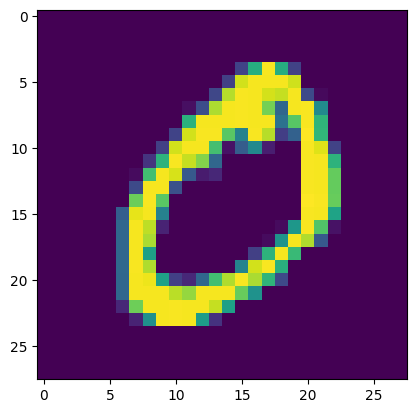

[5 0 4 ... 5 6 8]


In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])  # (x_train[1, :,:], cmap='gray')
plt.show()
print(y_train)

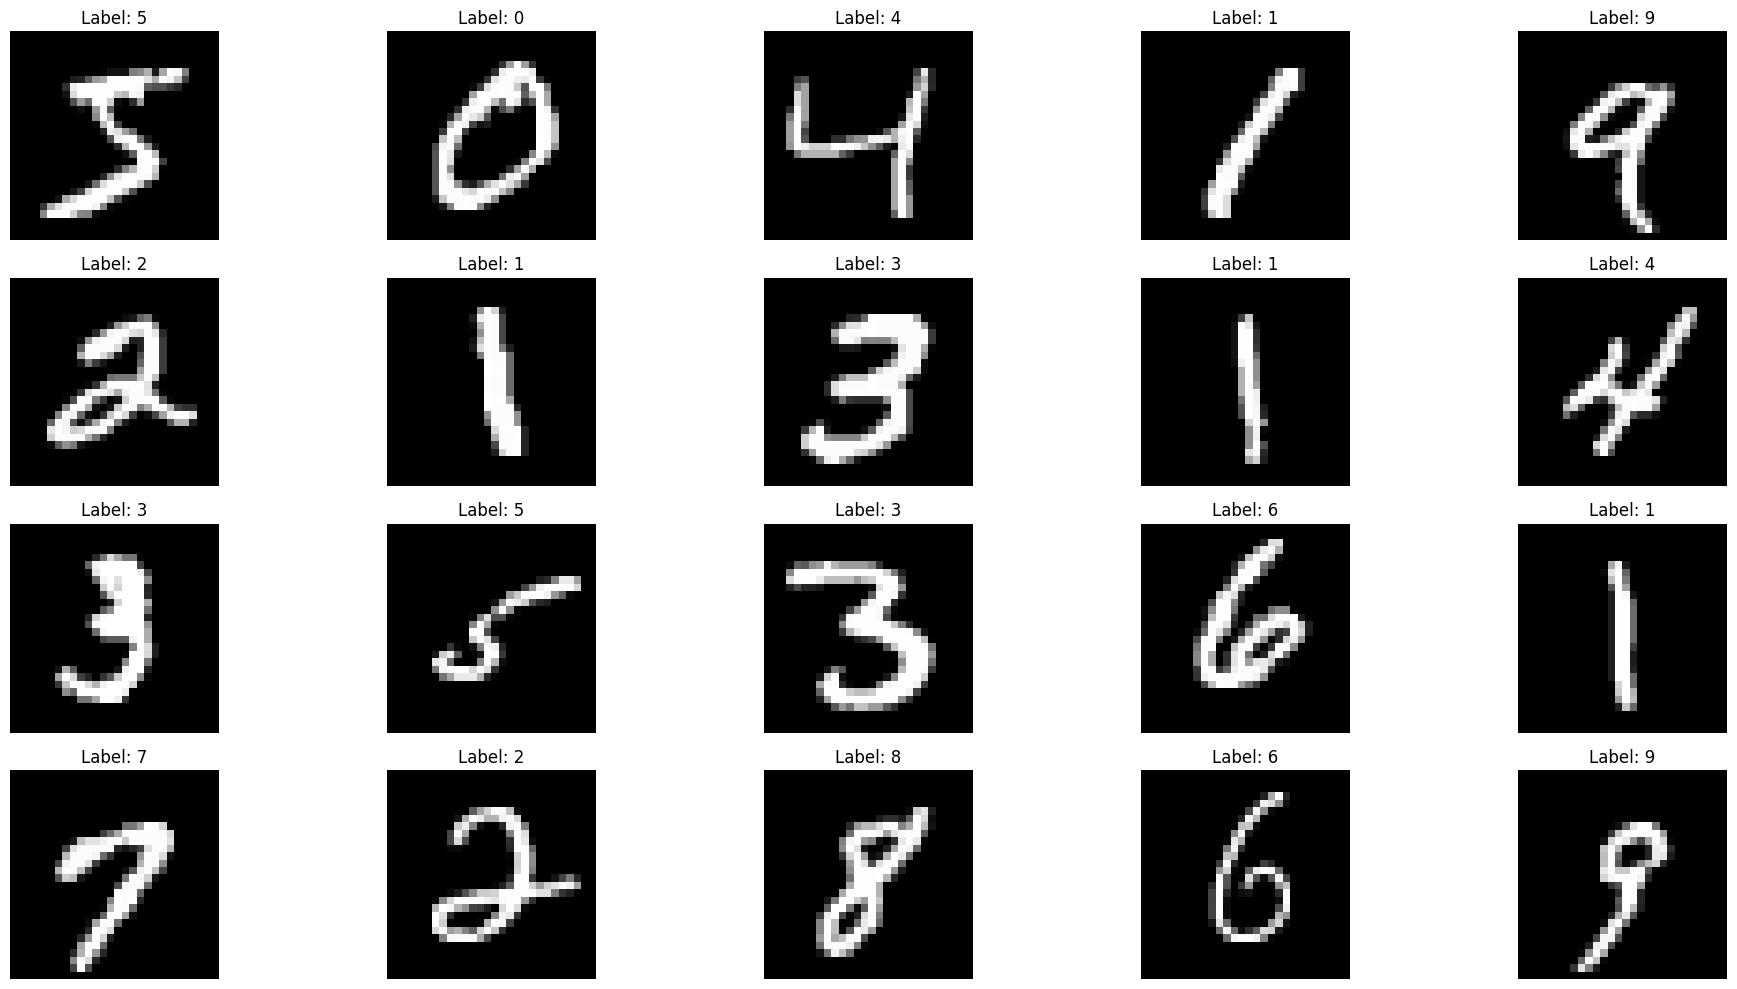

In [10]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing

In [12]:
# Scaling - to make the numerical value ranges from 0 to 1, instead of 0 to 255.
# To make the Models understand better / stabilize the Learning process
x_train = x_train / 255
x_test = x_test / 255

# Apply One Hot Encoding on y_train
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
x_train.shape, 28 * 28

((60000, 28, 28), 784)

In [15]:
# Reshaping the input metrix to make the Multi-Dimensions to 1D matrix, for creating input data set
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### Model Building

In [18]:
img_classifier = tf.keras.models.Sequential()

# Add the first hidden Layer with 64 Nuerons and sigmoid activation
# 64 is Hyper Parameter which can be choosen randomly
img_classifier.add(tf.keras.layers.Dense(units=64, activation='sigmoid', input_dim=784))

# Add the second hidden Layer with 64 Nuerons and sigmoid activation
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))

# Add the output Layer with 10 Nuerons and softmax activation
img_classifier.add(tf.keras.layers.Dense(units=10, activation='softmax'))

**Note** Always for Output Layer we cannot use the sigmoid activatation, since the sigmoid activation layer will provide the output in binary range from 0 to 1, this can be used only in the binary classification. For Multi Classification data sets we have to use the softmax activation for Output Layer

In [19]:
img_classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,706 (209.79 KB)

 Trainable params: 53,706 (209.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
img_classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
import datetime

print(datetime.datetime.now())
history = img_classifier.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
print(datetime.datetime.now())

2025-01-12 06:50:23.519262
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7471 - loss: 0.8512 - val_accuracy: 0.7761 - val_loss: 0.7794
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7803 - loss: 0.7668 - val_accuracy: 0.8027 - val_loss: 0.7039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8024 - loss: 0.6959 - val_accuracy: 0.8268 - val_loss: 0.6391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8283 - loss: 0.6295 - val_accuracy: 0.8453 - val_loss: 0.5850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8446 - loss: 0.5793 - val_accuracy: 0.8554 - val_loss: 0.5399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8578 - loss: 0.5360 - val_accuracy: 0.8665 - val_loss: 0.5014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8647 - loss: 0.5050 - val_accuracy: 0.8742 - val_loss: 0.4691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accurac

In [28]:
tf.keras.backend.clear_session()

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scaling - to make the numerical value ranges from 0 to 1, instead of 0 to 255.
# To make the Models understand better / stabilize the Learning process
x_train = x_train / 255
x_test = x_test / 255

# Apply One Hot Encoding on y_train
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshaping the input metrix to make the Multi-Dimensions to 1D matrix, for creating input data set
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

img_classifier = tf.keras.models.Sequential()

# Add the first hidden Layer with 64 Nuerons and sigmoid activation
img_classifier.add(tf.keras.layers.Dense(units=64, activation='sigmoid', input_dim=784))

# Add the second hidden Layer with 32 Nuerons and sigmoid activation
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))

# Add the output Layer with 10 Nuerons and softmax activation
img_classifier.add(tf.keras.layers.Dense(units=10, activation='softmax'))

img_classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = img_classifier.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1107 - loss: 2.3442 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1134 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1119 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1133 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1117 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3015
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1132 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1123 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1112 - loss: 2.3014 - 

#### Choosing an Activation Function
* **Hidden Layers**: ReLU, Leaky ReLU, or Swish are typically used.
* **Output Layer**:
  * **Binary classification**: ```Sigmoid```.
  * **Multi-class classification**: ```Softmax```.
  * **Regression**: ```Linear```.

In [30]:
tf.keras.backend.clear_session()

img_classifier = tf.keras.models.Sequential()

# Add the first hidden Layer with 64 Nuerons and sigmoid activation
img_classifier.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=784))

# Add the second hidden Layer with 32 Nuerons and sigmoid activation
img_classifier.add(tf.keras.layers.Dense(units=32, activation='relu'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='relu'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='relu'))
img_classifier.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Add the output Layer with 10 Nuerons and softmax activation
img_classifier.add(tf.keras.layers.Dense(units=10, activation='softmax'))

img_classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = img_classifier.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose="auto")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3902 - loss: 1.7286 - val_accuracy: 0.8916 - val_loss: 0.3760
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - loss: 0.3561 - val_accuracy: 0.9264 - val_loss: 0.2559
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9275 - loss: 0.2435 - val_accuracy: 0.9440 - val_loss: 0.1933
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9485 - loss: 0.1809 - val_accuracy: 0.9515 - val_loss: 0.1675
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9574 - loss: 0.1522 - val_accuracy: 0.9546 - val_loss: 0.1495
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9626 - loss: 0.1302 - val_accuracy: 0.9582 - val_loss: 0.1396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9661 - loss: 0.1170 - val_accuracy: 0.9573 - val_loss: 0.1397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9696 - loss: 0.1031 - 

In [35]:
# Prediction / Inference
img_classifier.predict(x_test[0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 784), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [36]:
img_classifier.input

ValueError: The layer sequential has never been called and thus has no defined input.

In [39]:
import numpy as np

x_test1 = np.expand_dims(x_test[0], axis=0)
result = img_classifier.predict(x_test1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [42]:
result


array([[7.3773028e-09, 1.3459474e-05, 3.7260586e-04, 9.5768145e-04,
        1.4181283e-08, 9.6796157e-07, 4.5731552e-09, 9.9864441e-01,
        3.4741610e-08, 1.0793806e-05]], dtype=float32)

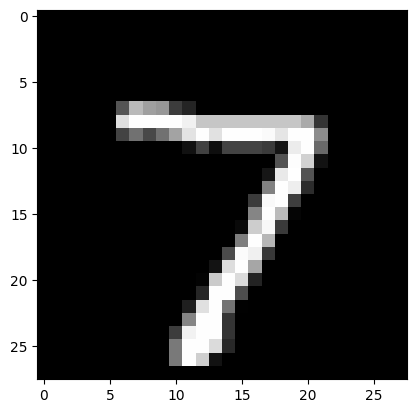

In [44]:
plt.imshow(x_test[0].reshape((28, 28)), cmap='gray')

In [45]:
# Evaluate Model for Loss function
img_classifier.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9571 - loss: 0.1438


[0.12320847064256668, 0.9632999897003174]

## Fine Tuning Model for Under fit / Over fit Case
